# The dataset

Dataset yang digunakan merupakan data book-crossing yang terdiri dari tiga file dalam ekstensi CSV yaitu:
1. BX-Users.csv
2. BX-Books.csv
3. BX-Book-Ratings.csv

In [1]:
#Loading neccesary packages
import numpy as np          # linear algebra
import pandas as pd         # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')


#Load dataset from bookcrossing
users = pd.read_csv("D:/MATA KULIAH/SEMESTER 7/PD_DAMI/Proyek/Data set/BX/BX-Users.csv", names=['User-ID', 'Location', 'Age'], encoding='latin-1', skiprows=1)
books = pd.read_csv("D:/MATA KULIAH/SEMESTER 7/PD_DAMI/Proyek/Data set/BX/BX-Books.csv", names=['ISBN', 'Book-Title' ,'Book-Author','Year-Of-Publication', 'Publisher', 'Image-Url-S', 'Image-Url-M', 'Image-Url-L'], encoding='latin-1', skiprows=1)
ratings = pd.read_csv("D:/MATA KULIAH/SEMESTER 7/PD_DAMI/Proyek/Data set/BX/BX-Book-Ratings.csv", names=['User-ID', 'ISBN', 'Book-Rating'], encoding='latin-1', skiprows=1)

In [2]:
#Print users header
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
#Print books header
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
#Print ratings header
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [5]:
#Print books info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-Url-S          271379 non-null  object
 6   Image-Url-M          271379 non-null  object
 7   Image-Url-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [6]:
#Print users info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [7]:
#Print ratings info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## Data Preprocessing

In [8]:
data = pd.merge(ratings, users, on='User-ID', how='inner')

In [9]:
data = pd.merge(data, books, on='ISBN', how='inner')

In [10]:
data.columns


Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-Url-S',
       'Image-Url-M', 'Image-Url-L'],
      dtype='object')

In [11]:
print("Dataset memiliki {} rows dan {} columns".format(data.shape[0], data.shape[1]))

Dataset memiliki 179102 rows dan 12 columns


In [12]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


# Data Cleaning

In [13]:
#delete features that are not needed in books data
data.drop(['Image-Url-S','Image-Url-M','Image-Url-L', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Location'],axis=1,inplace=True)

In [14]:
data.head()

,User-ID,ISBN,Book-Rating,Age,Book-Title
0,276725,034545104X,0,NaN,Flesh Tones: A Novel
1,2313,034545104X,5,23.0,Flesh Tones: A Novel
2,6543,034545104X,0,34.0,Flesh Tones: A Novel
3,8680,034545104X,5,2.0,Flesh Tones: A Novel
4,10314,034545104X,9,NaN,Flesh Tones: A Novel


In [15]:
#update all capital alphabet in dataset to lowercase and replace - with _ 
data.columns= data.columns.str.lower().str.replace('-', '_')

## Checking missing value in dataset

In [16]:
#check null value of feature book_author in books data
data.loc[(data['age'].isnull()),:]

,user_id,isbn,book_rating,age,book_title
0,276725,034545104X,0,NaN,Flesh Tones: A Novel
4,10314,034545104X,9,NaN,Flesh Tones: A Novel
6,28266,034545104X,0,NaN,Flesh Tones: A Novel
8,39002,034545104X,0,NaN,Flesh Tones: A Novel
9,50403,034545104X,9,NaN,Flesh Tones: A Novel
...,...,...,...,...,...
179094,250739,8845221806,0,NaN,Il comunista che mangiava i bambini ([Romanzo ...
179095,250739,8845224120,0,NaN,"Io E Lui (Fiction, Poetry and Drama)"
179096,250739,8874960018,0,NaN,L'Occhio Nero Al Panda Gliel'ho Fatto IO
179100,250764,002736660X,0,NaN,Branigan's Dog


In [17]:
#fill the missing value
data.loc[(data['book_title'].isnull()),:] = 'no mention'
#check null value of feature publisher in books data 
print(data['book_title'].isnull().sum())

0


In [18]:
#fill the missing value
data.loc[(data['isbn'].isnull()),:] = 'no mention'
#check null value of feature publisher in books data 
print(data['isbn'].isnull().sum())

0


In [19]:
jumlah = data.isnull().sum().sort_values(ascending=False)
persentase = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
#check missing value in users
missing_data = pd.concat([jumlah, persentase], axis=1, keys=['Jumlah', 'Pesentase Missing Data'])
missing_data['Pesentase Missing Data'] = missing_data['Pesentase Missing Data'].apply(lambda x: x * 100)

In [20]:
#check missing value in users based on Presentase missing data
missing_data.loc[missing_data['Pesentase Missing Data'] > 10]

,Jumlah,Pesentase Missing Data
age,44773,24.998604


In [21]:
#print sum of missing value in users data
print('Data yang hilang atau missing data')
round(data.isnull().sum() / len(data) * 100, 4)

Data yang hilang atau missing data


user_id         0.0000
isbn            0.0000
book_rating     0.0000
age            24.9986
book_title      0.0000
dtype: float64

In [22]:
#check mean of book_rating in books data
print('Rata-rata rating buku: ', round(data['book_rating'].mean()))

Rata-rata rating buku:  3


In [23]:
#check mean of book_rating in books data
print('Rata-rata rating buku: ', round(data['book_rating'].mean(), 5))

Rata-rata rating buku:  3.12777


# Replace NaN value in dataset

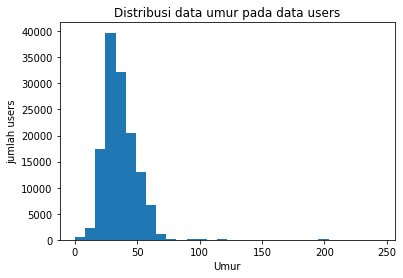

In [24]:
data.age.plot.hist(bins=30)
plt.title("Distribusi data umur pada data users")
plt.ylabel('jumlah users')
plt.xlabel('Umur');

In [25]:
#check how many rows and attributes of users data
data.shape

(179102, 5)

In [26]:
#check unique value of userid in users dataset
data['user_id'].unique()

array([276725, 2313, 6543, ..., 250692, 250707, 250734], dtype=object)

In [27]:
#check unique value of age in users dataset
data['age'].unique()

array([nan, 23.0, 34.0, 2.0, 45.0, 24.0, 36.0, 35.0, 51.0, 39.0, 52.0,
       72.0, 30.0, 46.0, 41.0, 33.0, 29.0, 21.0, 38.0, 63.0, 26.0, 59.0,
       44.0, 1.0, 16.0, 37.0, 32.0, 201.0, 56.0, 31.0, 54.0, 27.0, 49.0,
       50.0, 47.0, 40.0, 60.0, 69.0, 43.0, 42.0, 25.0, 22.0, 19.0, 18.0,
       64.0, 58.0, 68.0, 61.0, 67.0, 28.0, 209.0, 55.0, 71.0, 48.0, 57.0,
       62.0, 53.0, 13.0, 17.0, 15.0, 66.0, 14.0, 20.0, 75.0, 116.0, 11.0,
       92.0, 0.0, 80.0, 10.0, 9.0, 82.0, 12.0, 8.0, 152.0, 3.0, 104.0,
       65.0, 103.0, 70.0, 73.0, 7.0, 128.0, 78.0, 101.0, 76.0, 228.0,
       79.0, 83.0, 239.0, 77.0, 99.0, 84.0, 204.0, 98.0, 74.0, 93.0, 81.0,
       151.0, 100.0, 136.0, 97.0, 5.0, 157.0, 133.0, 90.0, 96.0, 4.0,
       146.0, 148.0, 168.0, 124.0, 141.0, 244.0, 105.0, 199.0, 220.0,
       85.0, 95.0, 108.0, 132.0, 6.0, 89.0, 223.0], dtype=object)

In [28]:
#check unique value of age in users dataset
data['book_rating'].unique()

array([0, 5, 9, 8, 6, 7, 4, 10, 3, 1, 2], dtype=object)

In [29]:
#check unique value of age in users dataset
data['book_title'].unique()

array(['Flesh Tones: A Novel', 'Help!: Level 1',
       'Les Particules Elementaires', ...,
       'Latticework: The New Investing', "Branigan's Dog",
       'Glamorous Movie Stars of the Thirties: Paper Dolls'], dtype=object)

In [30]:
#declare age = age value in users data
age = data['age']
#declare mean_age = mean of age in users data
mean_age = age.mean()

In [31]:
#print mean of age in users data
mean_age

36.23493065533131

In [32]:
#redeclare mean_age = round value mean of age in users data
mean_age = round(mean_age)

In [33]:
#fill missing value of age in users data with mean_age
age.fillna(value = mean_age, inplace = True)

In [34]:
#recheck missing value in users
jumlah = data.isnull().sum().sort_values(ascending=False)
persentase = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([jumlah, persentase], axis=1, keys=['Jumlah', 'Pesentase Missing Data'])
missing_data['Pesentase Missing Data'] = missing_data['Pesentase Missing Data'].apply(lambda x: x * 100)

# Data Transformation

In [35]:
#replace age >90 and age<5 in users data with nan 
data.loc[(data['age'] > 90) | (data['age'] < 5)] = np.nan
#fill nan value with mean of age
data['age'].fillna((data['age'].mean()), inplace=True)
data['age']= data['age'].astype('int64')
#Binning users into age groups using pandas.cut
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['age_group'] = pd.cut(data.age, range(0, 81, 10), right=False, labels=labels)
data[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,36,30-39
1,23,20-29
2,34,30-39
3,35,30-39
5,45,40-49
7,24,20-29
14,51,50-59
17,39,30-39
18,52,50-59
19,72,70-79


In [36]:
data['age_group'].unique()

['30-39', '20-29', '40-49', '50-59', '70-79', '60-69', '10-19', NaN, '0-9']
Categories (8, object): ['0-9' < '10-19' < '20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']

In [37]:
#check unique value of age in users dataset
data['age'].unique()

array([36, 23, 34, 35, 45, 24, 51, 39, 52, 72, 30, 46, 41, 33, 29, 21, 38,
       63, 26, 59, 44, 16, 37, 32, 56, 31, 54, 27, 49, 50, 47, 40, 60, 69,
       43, 42, 25, 22, 19, 18, 64, 58, 68, 61, 67, 28, 55, 71, 48, 57, 62,
       53, 13, 17, 15, 66, 14, 20, 75, 11, 80, 10,  9, 82, 12,  8, 65, 70,
       73,  7, 78, 76, 79, 83, 77, 84, 74, 81,  5, 90, 85,  6, 89],
      dtype=int64)

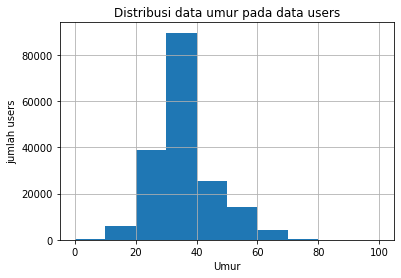

In [38]:
#create plot of age distribution
data.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Distribusi data umur pada data users')
plt.xlabel('Umur')
plt.ylabel('jumlah users')
plt.savefig('age_dist.png', bbox_inches='tight')
plt.show()

In [39]:
#check outliers of age value in users data
print('Jumlah outliers: ', sum(data['age'] > 100))

Jumlah outliers:  0


In [40]:
#check unique value of userid in users data
print('Jumlah pengguna: ',data['user_id'].nunique())

Jumlah pengguna:  34623


In [41]:
#check unique value of isbn in books data
print('Jumlah buku: ', data['isbn'].nunique())

Jumlah buku:  67134


In [42]:
#select data ISBN in books and merge with ratings
data = data[data.isbn.isin(data.isbn)]

In [47]:
#print value in unique_ratings data
data.tail()

,user_id,isbn,book_rating,age,book_title,age_group
179097,250750,1552790207,8,44,The Black Pope,40-49
179098,250750,1567920950,0,44,Reading in Bed: Personal Essays on the Glories...,40-49
179099,250750,1587990008,0,44,Latticework: The New Investing,40-49
179100,250764,002736660X,0,36,Branigan's Dog,30-39
179101,250764,048623715X,0,36,Glamorous Movie Stars of the Thirties: Paper D...,30-39


In [44]:
#feature engineering in book_rating with explicit and implicit value
ratings_explicit= data[data['book_rating'] != 0]
ratings_implicit= data[data['book_rating'] == 0]

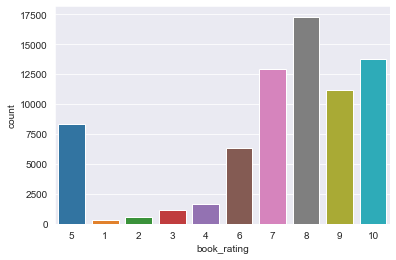

In [45]:
#create visualization ratings_explicit of book_rating distribution
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='book_rating')
plt.show()

In [46]:
#check ratings_explicit head of dataframe
ratings_explicit.tail()

,user_id,isbn,book_rating,age,book_title,age_group
179083,250709,1883695015,5,36,The Hidden Army: The Untold Story of Japan's M...,30-39
179084,250709,1891620614,10,36,The Global Me: New Cosmopolitans and the Compe...,30-39
179088,250709,4770029489,5,36,Dragon Dance,30-39
179089,250734,1891620495,10,37,Government's End: Why Washington Stopped Working,30-39
179097,250750,1552790207,8,44,The Black Pope,40-49


In [48]:
top_ten_books= pd.DataFrame(data.groupby('isbn')['book_rating'].count()
                         .sort_values(ascending=False).head(10))

print('The top ten books recommendation : ')
top_ten_books

The top ten books recommendation : 


,book_rating
isbn,
044023722X,592
067976402X,549
059035342X,511
044021145X,484
1400034779,388
044022165X,356
044651652X,329
006101351X,327
043935806X,303


In [49]:
new =pd.merge(top_ten_books, data, on='isbn')
new.head(10)

,isbn,book_rating_x,user_id,book_rating_y,age,book_title,age_group
0,044023722X,592,277212,8,36,A Painted House,30-39
1,044023722X,592,277411,0,48,A Painted House,40-49
2,044023722X,592,278418,0,36,A Painted House,30-39
3,044023722X,592,243,7,36,A Painted House,30-39
4,044023722X,592,256,8,36,A Painted House,30-39
5,044023722X,592,1435,0,36,A Painted House,30-39
6,044023722X,592,1530,8,26,A Painted House,20-29
7,044023722X,592,1608,0,27,A Painted House,20-29
8,044023722X,592,2907,5,36,A Painted House,30-39
9,044023722X,592,3167,0,42,A Painted House,40-49
